Final Project Python 
Student name: Oanh Doan 



##  List all the Python modules

In [69]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

## Reading data

In [2]:
dataFile = None
dataFile = pd.read_csv('home_data.csv', skipfooter=1)
#dataFile
selectedData=pd.DataFrame(dataFile, columns=[
                'num_bed',
                'year_built',
                'num_room',
                'num_bath',
                'living_area',
                'askprice'])
print(selectedData.head())

#print(dataFile.columns)

print(dataFile.shape)


   num_bed  year_built  num_room  num_bath  living_area  askprice
0        2        1993       5.0         1        97.55    272800
1        2        2003       5.0         1        94.02    421000
2        2        1996       7.0         2        93.37    364000
3        2        2002       4.0         1        78.97    420000
4        5        1946       9.0         3       167.23    719000
(555, 22)


C:\Users\missd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [3]:
#Data=dataFile.as_matrix
data1 = normalize(dataFile, axis=0)
data1

array([[ 0.03952075,  0.04242157, -0.04249866, ...,  0.00107611,
         0.03354223,  0.03028147],
       [ 0.03952075,  0.04263442, -0.04243835, ...,  0.04627287,
         0.04472297,  0.04673204],
       [ 0.03952075,  0.04248543, -0.04247336, ...,  0.04627287,
         0.04751816,  0.0404049 ],
       ...,
       [ 0.01976038,  0.04271956, -0.04249912, ...,  0.00645668,
         0.02795186,  0.02775062],
       [ 0.03952075,  0.04225129, -0.04247396, ...,  0.04519676,
         0.04844988,  0.03962788],
       [ 0.03952075,  0.04231514, -0.04243601, ...,  0.04627287,
         0.04751816,  0.03207971]])

In [74]:
#X = df[['X1','X2','X3','X4']].as_matrix() #calling as_matrix() on df returns a numpy.ndarray object
X = dataFile[['num_bed','year_built','living_area','num_room']].values
for i in itertools.islice(X, 5): 
    print(i)


[   2.   1993.     97.55    5.  ]
[2.000e+00 2.003e+03 9.402e+01 5.000e+00]
[   2.   1996.     93.37    7.  ]
[2.000e+00 2.002e+03 7.897e+01 4.000e+00]
[   5.   1946.    167.23    9.  ]


In [75]:
#islice() function in itertools to check first five items are correct?
Y = dataFile[['askprice']].values
for v in itertools.islice(Y, 5): 
    print(v)

[272800]
[421000]
[364000]
[420000]
[719000]


In [6]:
areaPrice=dataFile[['living_area','askprice']].values
np.savetxt('areaPrice.txt', areaPrice, delimiter=',')
bedAreaPrice=dataFile[['num_room','living_area','askprice']].values
np.savetxt('bedAreaPrice.txt', bedAreaPrice, delimiter=',')

In [76]:
with open('bedAreaPrice.txt', 'r') as fo:
    for items in fo.readlines():
        #print(items.strip())

SyntaxError: unexpected EOF while parsing (<ipython-input-76-b4c8780b9511>, line 3)

In [8]:
selectedData.describe()

,num_bed,year_built,num_room,num_bath,living_area,askprice
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,2.016216,1994.063063,5.058559,1.185586,98.166595,361366.895495
std,0.741807,25.407466,1.560655,0.398292,32.062462,125195.790875
min,1.000000,1850.000000,1.000000,1.000000,39.760000,150000.000000
25%,2.000000,1989.000000,4.000000,1.000000,81.585000,272400.000000
50%,2.000000,2004.000000,5.000000,1.000000,93.650000,335000.000000
75%,2.000000,2008.000000,6.000000,1.000000,108.045000,409950.000000
max,6.000000,2014.000000,14.000000,3.000000,522.300000,925000.000000


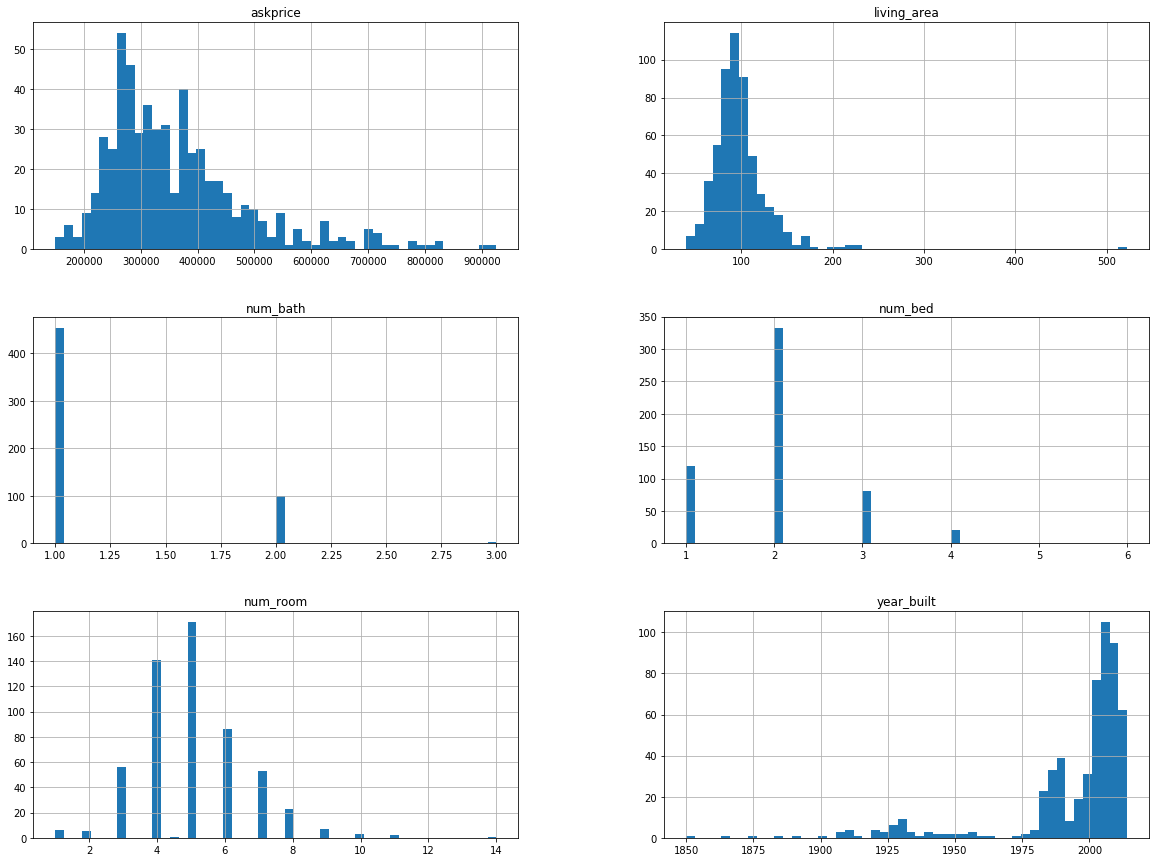

In [9]:
%matplotlib inline
selectedData.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

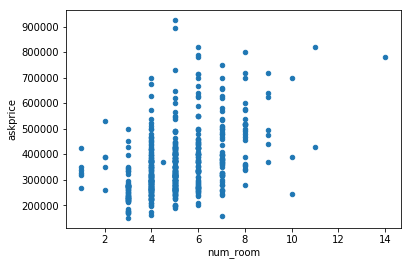

In [12]:
dataplot=dataFile[['num_room','askprice']]
dataplot.plot(kind='scatter', x='num_room', y='askprice')
plt.show()

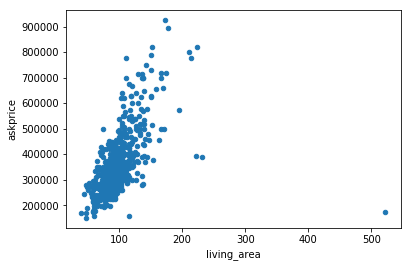

In [14]:
dataplot2=dataFile[['living_area','askprice']]
dataplot2.plot(kind='scatter', x='living_area', y='askprice')
plt.show()

In [15]:
def getData():
    # Get home data from CSV file
    dataFile = None
    if os.path.exists('home_data.csv'):
        print("-- home_data.csv found locally")
        dataFile = pd.read_csv('home_data.csv', skipfooter=1)

    return dataFile

## Select Model Linear Regression

In [16]:
#using Scikit_learn 
def linearRegressionModel(X_train, Y_train, X_test, Y_test):
    linear = linear_model.LinearRegression()
    # Training process
    linear.fit(X_train, Y_train)
    # Evaluating the model
    score_trained = linear.score(X_test, Y_test)

    return score_trained

## Main Code

In [17]:
if __name__ == "__main__":
    data = getData()
    if data is not None:
        # Selection few attributes
        attributes = list(
            [
                'num_bed',
                'year_built',
                'num_room',
                'num_bath',
                'living_area',
            ]
        )
        # Vector price of house
        Y = data['askprice']
        # print np.array(Y)
        # Vector attributes of house
        X = data[attributes]
        # Split data to training data and testing data
        X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.25)
        # Linear Regression Model
        linearScore = linearRegressionModel(X_train, Y_train, X_test, Y_test)
        lr = LinearRegression()
        #
        lr.fit(X_train, Y_train)
        Y_pred = lr.predict(X_test)
        # Extra check Check if split is actually correct
        print(X_train.shape)
        print(X_test.shape)
        print(Y_train.shape)
        print(Y_test.shape)
        #print ('Linear Score": %.4f' , % linearScore)
        print('Linear Regression variance score (1 is perfect score)": %.4f' % lr.score(X_test, Y_test))
        print('Mean squared Error": %.4f' % mean_squared_error(Y_test, Y_pred))

-- home_data.csv found locally
(416, 5)
(139, 5)
(416,)
(139,)
Linear Regression variance score (1 is perfect score)": 0.4549
Mean squared Error": 9211344425.3796


C:\Users\missd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [18]:
# the intercept value
print('the intercept: ', lr.intercept_)
#These are the coefficients of Independent variables (slope (m) of the regression line
print('the coefficients: ', lr.coef_)

the intercept:  927726.9691179928
the coefficients:  [  3720.4558881    -430.77006005  10303.70378586 118164.73227265
    957.31891639]


In [60]:
coefficients=lr.coef_[:].tolist()
print(attributes, type(attributes))
print(coefficients, type(coefficients))
#from itertools import zip
attributes_coef = dict(zip(attributes, coefficients))
print(attributes_coef)


['num_bed', 'year_built', 'num_room', 'num_bath', 'living_area'] <class 'list'>
[3720.4558880957416, -430.77006004633176, 10303.70378585943, 118164.73227265409, 957.3189163944274] <class 'list'>
{'num_bed': 3720.4558880957416, 'year_built': -430.77006004633176, 'num_room': 10303.70378585943, 'num_bath': 118164.73227265409, 'living_area': 957.3189163944274}


In [ ]:
#df_Attribute_Coef=pd.DataFrame(zip(attributes, coefficients), columns=["attributes", "coefficients"])
#print(df_Attribute_Coef)

In [64]:
# Dictionary comprehension to convert 2 list into a dictionary [attributes:coefficient(slope)]
v=coefficients
k=attributes
Atribute_coef_dict = {key:value for key, value in zip(k,v)}
Atribute_coef_dict

{'num_bed': 3720.4558880957416,
 'year_built': -430.77006004633176,
 'num_room': 10303.70378585943,
 'num_bath': 118164.73227265409,
 'living_area': 957.3189163944274}

## plot Y_pred and Y

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

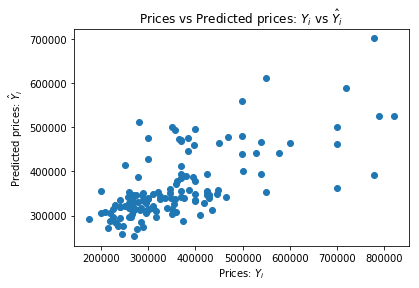

In [20]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

##  Predicting House Price from Size and Number of Bedrooms-Multivariate Linear Regression

In [21]:
data = np.genfromtxt('bedAreaPrice.txt', delimiter=',')
data


array([[5.0000e+00, 9.7550e+01, 2.7280e+05],
       [5.0000e+00, 9.4020e+01, 4.2100e+05],
       [7.0000e+00, 9.3370e+01, 3.6400e+05],
       ...,
       [3.0000e+00, 8.3980e+01, 2.5000e+05],
       [4.0000e+00, 1.0136e+02, 3.5700e+05],
       [4.0000e+00, 1.0145e+02, 2.8900e+05]])

In [22]:
data = normalize(data, axis=0)

In [23]:
X = data[:, 0:2]
Y = data[:, 2:]
#print(X)
#print(Y)

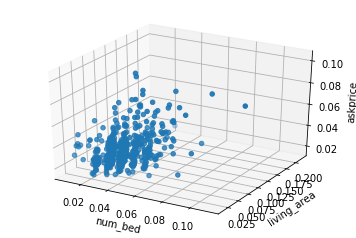

In [24]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('num_bed')
ax.set_ylabel('living_area')
ax.set_zlabel('askprice')

plt.show()

In [25]:
#Hyperparameters
learning_rate = 0.08
max_iteration = 200

In [26]:
s_learning_rate = 0.05
s_max_iteration = 200

In [27]:
mb_learning_rate = 0.07
mb_max_iteration = 200
batch_size = 55

In [28]:
#Parameters
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

## Hypothesis

In [29]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [30]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

## Calculate Gradients

In [31]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

## Batch Gradient Descent

In [32]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Mini-Batch Gradient Descent

In [33]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Stochastic Gradient Descent

In [34]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

## Train Model

In [35]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 20)

iteration :  0  loss :  0.0007768949234337976
iteration :  20  loss :  0.00012004241280291516
iteration :  40  loss :  9.689556670573612e-05
iteration :  60  loss :  9.605636275008869e-05
iteration :  80  loss :  9.600244851742271e-05
iteration :  100  loss :  9.597619698659737e-05
iteration :  120  loss :  9.595093825639468e-05
iteration :  140  loss :  9.59257334815667e-05
iteration :  160  loss :  9.590054959810963e-05
iteration :  180  loss :  9.587538542722304e-05


In [36]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 20)

iteration :  0  loss :  9.57070495572289e-05
iteration :  20  loss :  8.790208088364371e-05
iteration :  40  loss :  8.200965771191414e-05
iteration :  60  loss :  7.756769065843897e-05
iteration :  80  loss :  7.422503911314057e-05
iteration :  100  loss :  7.171495420120168e-05
iteration :  120  loss :  6.983486870429537e-05
iteration :  140  loss :  6.843101820287807e-05
iteration :  160  loss :  6.738673955380106e-05
iteration :  180  loss :  6.661356829742143e-05


In [37]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 20)

iteration :  0  loss :  0.0002678153114841662
iteration :  20  loss :  9.63149193869622e-05
iteration :  40  loss :  9.608756214180221e-05
iteration :  60  loss :  9.5861808013517e-05
iteration :  80  loss :  9.563764386284645e-05
iteration :  100  loss :  9.541505846988546e-05
iteration :  120  loss :  9.5194040693936e-05
iteration :  140  loss :  9.497457947294772e-05
iteration :  160  loss :  9.475666382296287e-05
iteration :  180  loss :  9.454028283756477e-05


## Optimal values of Parameters using Trained Model

In [38]:
theta

array([[0.03987517],
       [0.00282545],
       [0.00321955]])

In [39]:
s_theta

array([[0.01688493],
       [0.22306203],
       [0.32427298]])

In [40]:
mb_theta

array([[0.03803225],
       [0.01268056],
       [0.01559183]])

In [68]:
theta_list=theta.tolist()
s_theta_list=s_theta.tolist()
mb_theta_list=mb_theta.tolist()
sumtheta_list= []



[([0.039875168348998735], [0.01688492721953421], [0.03803225124989484]),
 ([0.039875168348998735], [0.01688492721953421], [0.01268055535073127]),
 ([0.039875168348998735], [0.01688492721953421], [0.01559182900841029]),
 ([0.039875168348998735], [0.2230620307424469], [0.03803225124989484]),
 ([0.039875168348998735], [0.2230620307424469], [0.01268055535073127]),
 ([0.039875168348998735], [0.2230620307424469], [0.01559182900841029]),
 ([0.039875168348998735], [0.3242729817585012], [0.03803225124989484]),
 ([0.039875168348998735], [0.3242729817585012], [0.01268055535073127]),
 ([0.039875168348998735], [0.3242729817585012], [0.01559182900841029]),
 ([0.002825453756715646], [0.01688492721953421], [0.03803225124989484]),
 ([0.002825453756715646], [0.01688492721953421], [0.01268055535073127]),
 ([0.002825453756715646], [0.01688492721953421], [0.01559182900841029]),
 ([0.002825453756715646], [0.2230620307424469], [0.03803225124989484]),
 ([0.002825453756715646], [0.2230620307424469], [0.0126805

## Cost vs Iteration Plots

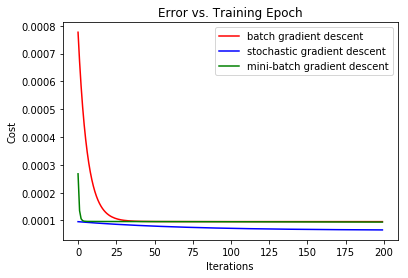

In [41]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

## Visualize the Data

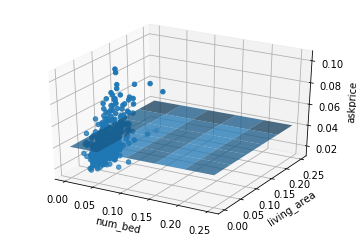

In [55]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('num_bed')
ax.set_ylabel('living_area')
ax.set_zlabel('askprice')


x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.75)
    
plt.show()

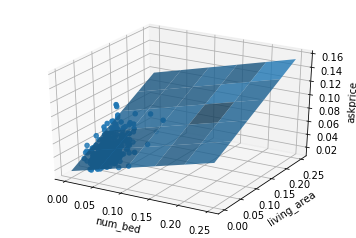

In [49]:

# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)
ax.set_xlabel('num_bed')
ax.set_ylabel('living_area')
ax.set_zlabel('askprice')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.8)
    
plt.show()

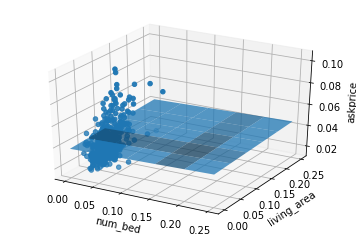

In [57]:

# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.75)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('num_bed')
ax.set_ylabel('living_area')
ax.set_zlabel('askprice')

    
plt.show()